#US 2020 Election Prediction

---










In this project, our aim is to predict the results of the 2020 US election.
The data will be obtained from [FiveThirtyEight](https://fivethirtyeight.com/).

Steps:

1.   Read in the data from a csv file from the website [FiveThirtyEight](https:/
/fivethirtyeight.com/)

1.   Observe and analyze the data.

1.   Clean the data

1.   Visualize the data

1.   Perform some statistical analysis on the data

1.   Simulate election results

1.   Visualize the end results

##Data Analysis

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
url1="https://github.com/JuliaKav/US-Elections/blob/main/president_polls.csv?raw=true"
url="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/president_polls.csv"
df = pd.read_csv(url)
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,seat_number,seat_name,start_date,end_date,election_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,800.0,lv,lv,Automated Phone,U.S. President,0,NaN,10/18/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,Emerson College,A-,506.0,lv,lv,IVR/Online,U.S. President,0,NaN,10/17/20,10/19/20,11/3/20,NaN,False,NaN,NaN,False,False,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,Public Policy Polling,B,648.0,v,v,Automated Phone,U.S. President,0,NaN,11/27/18,11/28/18,11/3/20,NaN,False,DEM,NaN,False,False,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,Rasmussen Reports/Pulse Opinion Research,C+,1000.0,lv,lv,IVR/Online,U.S. President,0,NaN,11/12/18,11/13/18,11/3/20,NaN,False,NaN,NaN,False,False,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   question_id                11909 non-null  int64  
 1   poll_id                    11909 non-null  int64  
 2   cycle                      11909 non-null  int64  
 3   state                      7363 non-null   object 
 4   pollster_id                11909 non-null  int64  
 5   pollster                   11909 non-null  object 
 6   sponsor_ids                6523 non-null   object 
 7   sponsors                   6523 non-null   object 
 8   display_name               11909 non-null  object 
 9   pollster_rating_id         11901 non-null  float64
 10  pollster_rating_name       11901 non-null  object 
 11  fte_grade                  10980 non-null  object 
 12  sample_size                11907 non-null  float64
 13  population                 11909 non-null  obj

In [240]:
df["start_date"]=pd.to_datetime(df["start_date"])
df["end_date"]=pd.to_datetime(df["end_date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   question_id                11909 non-null  int64         
 1   poll_id                    11909 non-null  int64         
 2   cycle                      11909 non-null  int64         
 3   state                      7363 non-null   object        
 4   pollster_id                11909 non-null  int64         
 5   pollster                   11909 non-null  object        
 6   sponsor_ids                6523 non-null   object        
 7   sponsors                   6523 non-null   object        
 8   display_name               11909 non-null  object        
 9   pollster_rating_id         11901 non-null  float64       
 10  pollster_rating_name       11901 non-null  object        
 11  fte_grade                  10980 non-null  object        
 12  samp

In [241]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

In [242]:
df=df[['question_id','poll_id', 'state', 'pollster', 'start_date', 'end_date', 'answer', 'pct']]

In [243]:
df['state'].unique()

array(['Ohio', 'Pennsylvania', 'Georgia', nan, 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2', 'Nebraska CD-1'], dtype=object)

In [244]:
print(len(df.pollster.unique()))

196


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


##Data Cleaning


We are interested in the polls from three month ahead of the election date, thus polls between August 1st and November 2nd.


In [246]:
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0


In [247]:
start_dt="2020-08-01"
end_dt="2020-11-02"
mask=(df['start_date'] >= start_dt) & (df['end_date'] <= end_dt)
df = df[mask]

In [248]:
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [249]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


We are only interested in Trump or Biden as candidates so we will remove the other candidates.

In [250]:
df['answer'].unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [251]:
##df = df[(df['answer'] == 'Biden') | (df['answer']== 'Trump')]
candidates=["Biden", "Trump"]
df=df.loc[df["answer"].isin(candidates)]

In [252]:
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5288,127307,67986,NaN,Morning Consult,2020-08-01,2020-08-03,Trump,42.00
5289,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,52.72
5290,132507,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Trump,44.88
5291,132632,70853,NaN,SurveyMonkey,2020-08-01,2020-08-03,Biden,51.92


In [253]:
df['answer'].unique()

array(['Biden', 'Trump'], dtype=object)

In [254]:
df.isnull().sum()

question_id       0
poll_id           0
state          1446
pollster          0
start_date        0
end_date          0
answer            0
pct               0
dtype: int64

We can see that the state column has null values. We can remove those.

In [255]:
df=df[df['state'].notna()]
df['state'].isna().sum()

0

We notice that every poll_id has two rows with mostly the same information, so we can combine those two rows into one.

In [256]:
len(df['poll_id'].unique())

1062

In [257]:
df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0


In [258]:
df_even=df[df.index % 2 ==0].reset_index(drop=True).add_suffix('_sec')
df_odd=df[df.index %2 !=0].reset_index(drop=True)

In [259]:
df_even, df_odd

(      question_id_sec  poll_id_sec  ... answer_sec pct_sec
 0              133816        71450  ...      Biden    48.0
 1              133838        71457  ...      Biden    50.0
 2              133777        71435  ...      Biden    47.0
 3              133664        71379  ...      Biden    49.0
 4              133666        71379  ...      Biden    49.0
 ...               ...          ...  ...        ...     ...
 1596           127277        67973  ...      Trump    45.0
 1597           127577        68113  ...      Trump    51.0
 1598           127578        68114  ...      Trump    49.0
 1599           127579        68115  ...      Trump    46.0
 1600           127580        68116  ...      Trump    47.0
 
 [1601 rows x 8 columns],
       question_id  poll_id         state  ...   end_date answer   pct
 0          133816    71450          Ohio  ... 2020-10-19  Trump  47.0
 1          133838    71457  Pennsylvania  ... 2020-10-19  Trump  47.0
 2          133777    71435       Georg

In [260]:
new_df = pd.concat([df_odd, df_even], axis=1)

In [261]:
new_df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,question_id_sec,poll_id_sec,state_sec,pollster_sec,start_date_sec,end_date_sec,answer_sec,pct_sec
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
2,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
3,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0
4,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0
1597,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0
1598,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0
1599,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0


In [262]:
new_df['state'].unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

We notice that some states have some additional string such as 'CD-1' appended to them. We will remove those.

In [263]:
new_df['state']=new_df['state'].str.rstrip(' CD-1')
new_df['state']=new_df['state'].str.rstrip(' CD-2')

In [264]:
new_df['state'].unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

We will now add three columns, Biden, Trump, Seats for a clearer dataset.

In [265]:
new_df.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,question_id_sec,poll_id_sec,state_sec,pollster_sec,start_date_sec,end_date_sec,answer_sec,pct_sec
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0
1,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0
2,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0
3,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0
4,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0


We will create a dictionary to include the number of seats corresponding to each state.


In [266]:
seats= {
        'Alaska':3,
        'Alabama':9,
        'Arkansas':6,
        'Arizona':11,
        'California':55,
        'Colorado':9,
        'Connecticut':7,
        'Delaware':3,
        'District of Columbia':3,
        'Florida':29,
        'Georgia':16,
        'Hawaii':4,
        'Iowa':6,
        'Idaho':4,
        'Illinois':20,
        'Indiana':11,
        'Kansas':6,
        'Kentucky':8,
        'Louisiana':8,
        'Massachusetts':11,
        'Maryland':10,
        'Maine':4,
        'Michigan':16,
        'Minnesota':10,
        'Missouri':10,
        'Mississippi':6,
        'Montana':3,
        'North Carolina':15,
        'North Dakota':3,
        'Nebraska':5,
        'New Hampshire':4,
        'New Jersey':14,
        'New Mexico':5,
        'Nevada':6,
        'New York':29,
        'Ohio':18,
        'Oklahoma':7,
        'Oregon':7,
        'Pennsylvania':20,
        'Rhode Island':4,
        'South Carolina':9,
        'South Dakota':3,
        'Tennessee':11,
        'Texas':38,
        'Utah':6,
        'Virginia':13,
        'Vermont':3,
        'Washington':12,
        'Wisconsin':10,
        'West Virginia':5,
        'Wyoming':3
}

In [267]:
def get_seats(row):
  return(seats[row['state']])

new_df['seats'] = new_df.apply(get_seats, axis=1)
new_df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,question_id_sec,poll_id_sec,state_sec,pollster_sec,start_date_sec,end_date_sec,answer_sec,pct_sec,seats
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,18
1,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,20
2,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,16
3,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,20
4,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,11
1597,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,11
1598,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,29
1599,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,20


We now want to add two new columns, one containing Trump percentage of votes and one containing Biden percentage of votes.

In [268]:
def get_votes(row, name):
  if (row['answer'] == name):
    return(row['pct'])
  else:
    return(row['pct_sec'])

new_df['Trump']= new_df.apply(get_votes,args=('Trump',), axis=1)
new_df['Biden']=new_df.apply(get_votes,args=('Biden',), axis=1)

new_df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,question_id_sec,poll_id_sec,state_sec,pollster_sec,start_date_sec,end_date_sec,answer_sec,pct_sec,seats,Trump,Biden
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,48.0,18,47.0,48.0
1,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Trump,47.0,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-18,2020-10-19,Biden,50.0,20,47.0,50.0
2,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Trump,48.4,133777,71435,Georgia,Emerson College,2020-10-17,2020-10-19,Biden,47.0,16,48.4,47.0
3,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133664,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,20,45.0,49.0
4,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Trump,45.0,133666,71379,Pennsylvania,Ipsos,2020-10-13,2020-10-19,Biden,49.0,20,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Biden,49.0,127277,67973,Arizona,OH Predictive Insights,2020-08-03,2020-08-04,Trump,45.0,11,45.0,49.0
1597,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Biden,48.0,127577,68113,Arizona,OnMessage Inc.,2020-08-02,2020-08-04,Trump,51.0,11,51.0,48.0
1598,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Biden,49.0,127578,68114,Florida,OnMessage Inc.,2020-08-02,2020-08-04,Trump,49.0,29,49.0,49.0
1599,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Biden,50.0,127579,68115,Pennsylvania,OnMessage Inc.,2020-08-02,2020-08-04,Trump,46.0,20,46.0,50.0


#Visualization

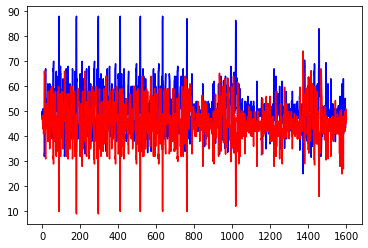

In [269]:
plt.plot(new_df['Biden'], color='blue')
plt.plot(new_df['Trump'], color='red')

Plotting the difference in votes between both candidates would be more interesting.
First we group the candidates by start date and take the mean of both for each date.


In [270]:

diff_df=new_df.groupby('start_date')['Biden','Trump'].mean().reset_index()
diff_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,start_date,Biden,Trump
0,2020-08-01,50.142381,47.676381
1,2020-08-02,48.800000,47.000000
2,2020-08-03,49.500000,43.500000
3,2020-08-04,47.916667,44.416667
4,2020-08-05,47.661667,43.793333
...,...,...,...
73,2020-10-14,50.866667,44.766667
74,2020-10-15,48.800000,46.700000
75,2020-10-16,47.100000,41.900000
76,2020-10-17,47.000000,48.400000


In [271]:
diff_df['Difference']=diff_df['Biden'] - diff_df['Trump']

In [272]:
diff_df

,start_date,Biden,Trump,Difference
0,2020-08-01,50.142381,47.676381,2.466000
1,2020-08-02,48.800000,47.000000,1.800000
2,2020-08-03,49.500000,43.500000,6.000000
3,2020-08-04,47.916667,44.416667,3.500000
4,2020-08-05,47.661667,43.793333,3.868333
...,...,...,...,...
73,2020-10-14,50.866667,44.766667,6.100000
74,2020-10-15,48.800000,46.700000,2.100000
75,2020-10-16,47.100000,41.900000,5.200000
76,2020-10-17,47.000000,48.400000,-1.400000


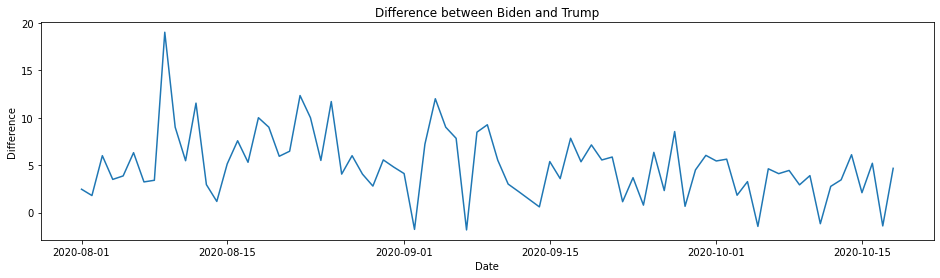

In [273]:
plt.figure(figsize=(16,4))
plt.plot('start_date', 'Difference', data=diff_df)
plt.title('Difference between Biden and Trump')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

We want our final dataframe to comprise only the following fields: state, pollster, end_date, Biden, Trump, seats.

In [274]:
polls_df= new_df[['state', 'pollster', 'end_date', 'Biden', 'Trump','seats']]

In [275]:
polls_df

,state,pollster,end_date,Biden,Trump,seats
0,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18
1,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20
2,Georgia,Emerson College,2020-10-19,47.0,48.4,16
3,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20
4,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20
...,...,...,...,...,...,...
1596,Arizona,OH Predictive Insights,2020-08-04,49.0,45.0,11
1597,Arizona,OnMessage Inc.,2020-08-04,48.0,51.0,11
1598,Florida,OnMessage Inc.,2020-08-04,49.0,49.0,29
1599,Pennsylvania,OnMessage Inc.,2020-08-04,50.0,46.0,20


Subsequently, we will be adding a center and a standard deviation columns to the new dataframe. 
The center is calculated using the percentage of people who haven't voted for Trump or Biden. This amount is divided in two and added to the Biden percentages, i.e. if Biden has 48 and Trump has 46, then the center is calculated as 48 + (100-48-46)/2=51.
The standard deviation will be calculated as the percentage of undecided plus 3.

In [276]:
def get_center(row):
  center=row['Biden']+(100-row['Biden']-row['Trump'])/2
  return center

def get_std_dev(row):
  std_dev=abs(row['Biden']- row['Trump'])/2 +3
  return(std_dev)

In [277]:
polls_df['center']=polls_df.apply(get_center, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
polls_df['standard deviation']=polls_df.apply(get_std_dev, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [279]:
polls_df


,state,pollster,end_date,Biden,Trump,seats,center,standard deviation
0,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18,50.5,3.5
1,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20,51.5,4.5
2,Georgia,Emerson College,2020-10-19,47.0,48.4,16,49.3,3.7
3,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,5.0
4,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,5.0
...,...,...,...,...,...,...,...,...
1596,Arizona,OH Predictive Insights,2020-08-04,49.0,45.0,11,52.0,5.0
1597,Arizona,OnMessage Inc.,2020-08-04,48.0,51.0,11,48.5,4.5
1598,Florida,OnMessage Inc.,2020-08-04,49.0,49.0,29,50.0,3.0
1599,Pennsylvania,OnMessage Inc.,2020-08-04,50.0,46.0,20,52.0,5.0


In the next step, we are going to add a summary which averages the polls for each state.

In [280]:
summ_df=polls_df.groupby('state').mean().reset_index()

In [281]:
summ_df

,state,Biden,Trump,seats,center,standard deviation
0,Alabama,39.769048,57.161429,9,41.303810,11.696190
1,Alaska,44.020000,52.478636,3,45.770682,7.229318
2,Arizona,49.248514,45.155946,11,52.046284,5.322500
3,Arkansas,38.753684,58.801579,6,39.976053,13.023947
4,California,62.081923,33.621154,55,64.230385,17.230385
5,Colorado,55.022903,40.454194,9,57.284355,10.284355
6,Connecticut,62.420000,34.561111,7,63.929444,16.929444
7,Delaware,63.388500,33.953500,3,64.717500,17.717500
8,District of Columbia,86.283889,11.117222,3,87.583333,40.583333
9,Florida,48.740263,46.046842,29,51.346711,4.551184


#Simulation of polling
We are going to perform a simulation where we obtain a set of seats results randomly from a normal distribution using summ_df Dataframe. If the number of seats is above 50 Biden wins and if not, he loses.


In [282]:
from numpy.random import normal

def run_sim(count, polls_sum):
  result_df=pd.DataFrame()

  def get_seats(row):
    seats=normal(row['center'], row['standard deviation'])
    return(row['seats'] if seats>50 else 0 )

  for i in range(count):
    result_df[i]=polls_sum.apply(get_seats, axis=1)
  return(result_df)

results=run_sim(10, summ_df)

results.loc['Total'] = results.sum()
results=pd.concat([summ_df['state'], results], axis=1)

In [283]:
results

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0,0,0,0,0,9,0,0,0,0
1,Alaska,0,0,3,0,0,3,0,3,3,3
2,Arizona,11,0,11,0,0,11,11,0,0,0
3,Arkansas,6,0,6,0,0,0,0,0,0,0
4,California,55,0,55,0,55,55,55,55,55,55
5,Colorado,9,9,9,9,0,9,0,9,9,9
6,Connecticut,7,7,7,7,7,7,7,0,7,7
7,Delaware,3,3,3,3,3,3,0,3,3,3
8,District of Columbia,3,3,3,0,3,3,3,3,3,3
9,Florida,29,29,29,0,29,29,29,0,0,0


In [284]:
# A 0 indicates that Trump won, so we want to create a dataframe indicating for each state the percentage where Trump wins.
res=pd.DataFrame((results==0).sum(axis=1))

tr_result=pd.concat([results['state'],res], axis=1)
tr_result.columns=['state','Trump wins']


In [285]:
tr_result['% Trump wins']=(tr_result['Trump wins'] /10) *100

In [286]:
tr_result

,state,Trump wins,% Trump wins
0,Alabama,9,90.0
1,Alaska,5,50.0
2,Arizona,6,60.0
3,Arkansas,8,80.0
4,California,2,20.0
5,Colorado,2,20.0
6,Connecticut,1,10.0
7,Delaware,1,10.0
8,District of Columbia,1,10.0
9,Florida,4,40.0


We will simulate for 1000 cycles.

In [287]:
num_sim=1000
elec_res= run_sim(num_sim,summ_df)
elec_res.loc['Total']=elec_res.sum(axis=0)

biden_wins=elec_res.loc['Total'][elec_res.loc['Total']>270].count()
f"Joe Biden wins {biden_wins} times out of {num_sim} simulations."



'Joe Biden wins 852 times out of 1000 simulations.'

We will now creat another dataframe which indicates per state the percentages for Biden wins and Trumps wins.

In [288]:
summ_tr_per_state= pd.DataFrame((elec_res==0).sum(axis=1))

In [289]:
summ_tr_per_state

,0
0,762
1,722
2,367
3,791
4,199
5,237
6,207
7,219
8,171
9,382


In [290]:
results_summ=pd.concat([summ_df['state'],summ_tr_per_state], axis=1)

In [291]:
results_summ.columns=['state','Trump wins']

In [292]:
results_summ['% Trump wins']= (results_summ['Trump wins'] /num_sim) *100

In [293]:
results_summ['% Biden wins']=100- results_summ['% Trump wins']

In [294]:
results_summ

,state,Trump wins,% Trump wins,% Biden wins
0,Alabama,762,76.2,23.8
1,Alaska,722,72.2,27.8
2,Arizona,367,36.7,63.3
3,Arkansas,791,79.1,20.9
4,California,199,19.9,80.1
5,Colorado,237,23.7,76.3
6,Connecticut,207,20.7,79.3
7,Delaware,219,21.9,78.1
8,District of Columbia,171,17.1,82.9
9,Florida,382,38.2,61.8


In [300]:
results_summ.dropna()

,state,Trump wins,% Trump wins,% Biden wins
0,Alabama,762,76.2,23.8
1,Alaska,722,72.2,27.8
2,Arizona,367,36.7,63.3
3,Arkansas,791,79.1,20.9
4,California,199,19.9,80.1
5,Colorado,237,23.7,76.3
6,Connecticut,207,20.7,79.3
7,Delaware,219,21.9,78.1
8,District of Columbia,171,17.1,82.9
9,Florida,382,38.2,61.8


In [312]:
results_summ.drop('Total', axis=0, inplace=True)

We are now going to append three new columns to the dataframe indicating the number of seats, the number of seats Biden won and the number Trump won.

In [338]:
def getseats(row):
  return seats[row['state']]

results_summ
results_summ['seats']=results_summ.apply(getseats, axis=1)

In [339]:
results_summ.head()

,state,Trump wins,% Trump wins,% Biden wins,seats,seats Trump wins,seats Biden wins
0,Alabama,762,76.2,23.8,9,685.8,0
1,Alaska,722,72.2,27.8,3,216.6,0
2,Arizona,367,36.7,63.3,11,403.7,1
3,Arkansas,791,79.1,20.9,6,474.6,0
4,California,199,19.9,80.1,55,1094.5,1


In [340]:
results_summ['seats Trump wins']=results_summ['% Trump wins'].apply(lambda x: 1 if x > 50 else 0)

In [341]:
results_summ['seats Trump wins']=results_summ['seats Trump wins'] * results_summ['seats']

In [342]:
results_summ['seats Biden wins']=results_summ['% Biden wins'].apply(lambda x: 1 if x > 50 else 0)

In [344]:
results_summ['seats Biden wins']=results_summ['seats Biden wins'] * results_summ['seats']


In [345]:
results_summ.head()

,state,Trump wins,% Trump wins,% Biden wins,seats,seats Trump wins,seats Biden wins
0,Alabama,762,76.2,23.8,9,9,0
1,Alaska,722,72.2,27.8,3,3,0
2,Arizona,367,36.7,63.3,11,0,11
3,Arkansas,791,79.1,20.9,6,6,0
4,California,199,19.9,80.1,55,0,55


#Visualization of the results

In [359]:
import plotly.graph_objects as go

In [367]:
# We need to replace the state names by their abbreviated form in order for the Choropleth map to work.

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

results_summ=results_summ.replace({'state':us_state_to_abbrev})

fig=go.Figure(data=go.Choropleth(
    locations=results_summ['state'],
    z=results_summ['% Trump wins'].astype(float),
    locationmode='USA-states',
    colorscale='Bluered',colorbar_title='Trump',
    ))

In [368]:
title=f'{num_sim} simulations show Biden winning.'

In [369]:
fig.update_layout(title_text=title,geo_scope='usa')
fig.show()
results_summ.head()

,state,Trump wins,% Trump wins,% Biden wins,seats,seats Trump wins,seats Biden wins
0,AL,762,76.2,23.8,9,9,0
1,AK,722,72.2,27.8,3,3,0
2,AZ,367,36.7,63.3,11,0,11
3,AR,791,79.1,20.9,6,6,0
4,CA,199,19.9,80.1,55,0,55
